In [2]:
from google.colab import files
uploaded = files.upload() 

Saving BSD100_TRAINING.zip to BSD100_TRAINING.zip


In [0]:
!unzip BSD100_TRAINING.zip

In [4]:
from google.colab import files
uploaded = files.upload()

Saving baby_GT.bmp to baby_GT.bmp


In [43]:
!ls

baby_GT.bmp  BSD100_TRAINING  BSD100_TRAINING.zip  sample_data


In [0]:
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras import optimizers
from keras.models import load_model
import numpy as np
import scipy.misc
import scipy.ndimage
import cv2
import math
import glob
import matplotlib.pyplot as plt

In [18]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape))
C1 = Conv2D(64,(9,9),padding='SAME',name='CONV1')(input_img)
A1 = Activation('relu', name='act1')(C1)
C2 = Conv2D(32,(1,1),padding='SAME',name='CONV2')(A1)
A2 = Activation('relu', name='act2')(C2)
C3 = Conv2D(1,(5,5),padding='SAME',name='CONV3')(A2)
A3 = Activation('relu', name='act3')(C3)
model = Model(input_img, A3)
opt = optimizers.Adam(lr=0.0003)
model.compile(optimizer=opt,loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 32, 32, 64)        5248      
_________________________________________________________________
act1 (Activation)            (None, 32, 32, 64)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 32, 32, 32)        2080      
_________________________________________________________________
act2 (Activation)            (None, 32, 32, 32)        0         
_________________________________________________________________
CONV3 (Conv2D)               (None, 32, 32, 1)         801       
_________________________________________________________________
act3 (Activation)            (None, 32, 32, 1)         0         
Total para

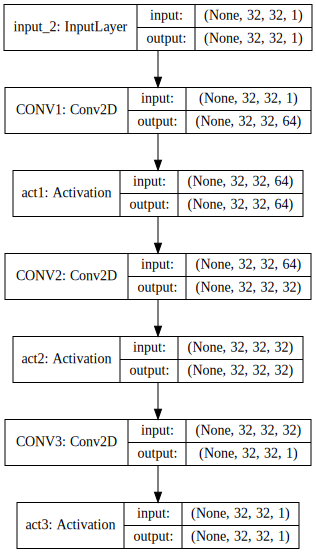

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
def modcrop(image, scale=2): #BY DEFAULT SCALE 2
    if len(image.shape) == 3:
        h, w, _ = image.shape
        h = h - np.mod(h, scale)
        w = w - np.mod(w, scale)
        image = image[0:h, 0:w, :]
    else:
        h, w = image.shape
        h = h - np.mod(h, scale)
        w = w - np.mod(w, scale)
        image = image[0:h, 0:w]
    return image

In [0]:
def create_LR(image,scale):
    label_ = modcrop(image, scale)
    label_ = label_ / 255.
    input_ = scipy.ndimage.interpolation.zoom(label_, (1./scale), prefilter=False)
    input_ = scipy.ndimage.interpolation.zoom(input_, (scale/1.), prefilter=False)
    return input_

In [0]:
path = 'BSD100_TRAINING/'
files_y = glob.glob(path + '*.*')
trainfiles = files_y[:60]             #HERE TOTAL IMAGES ARE 91 , SO FROM 91 up to 85 used for Training
valfiles = files_y[60:]               #HERE Above 85 used for Validation Set
img_size = 32
stride = 16
X_train = []
Y_train = []
X_val = []
Y_val = []

In [28]:
# Extract patch image for training
for file_y in trainfiles:
    tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
    tmp_X = create_LR(tmp_y,2) #############################################################SCALE###########
    h,w = tmp_y.shape
    for x in range(0, h-img_size+1, stride):
        for y in range(0, w-img_size+1, stride):
            sub_input = tmp_X[x:x+img_size,y:y+img_size].reshape(img_size,img_size,1)
            sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
            X_train.append(sub_input)
            Y_train.append(sub_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [29]:
# Extract patch image for validation
for file_y in valfiles:
    tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
    tmp_X = create_LR(tmp_y,2)###########################################################SCALE################
    h,w = tmp_y.shape
    for x in range(0, h-img_size+1, stride):
        for y in range(0, w-img_size+1, stride):
            sub_input = tmp_X[x:x+img_size,  y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
            sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
            X_val.append(sub_input)
            Y_val.append(sub_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [31]:
model.fit(X_train, Y_train, batch_size = 128, epochs = 30, validation_data=(X_val, Y_val))
model.save('wscale2.h5')

Train on 11519 samples, validate on 5683 samples
Epoch 1/30
11519/11519 [==============================] - 3s 235us/step - loss: 14513.1320 - val_loss: 7568.1863
Epoch 2/30
11519/11519 [==============================] - 2s 194us/step - loss: 2553.0830 - val_loss: 1531.2836
Epoch 3/30
11519/11519 [==============================] - 2s 193us/step - loss: 1459.7241 - val_loss: 1354.5211
Epoch 4/30
11519/11519 [==============================] - 2s 192us/step - loss: 1180.4371 - val_loss: 978.8464
Epoch 5/30
11519/11519 [==============================] - 2s 193us/step - loss: 785.8047 - val_loss: 622.6985
Epoch 6/30
11519/11519 [==============================] - 2s 193us/step - loss: 569.3150 - val_loss: 526.2545
Epoch 7/30
11519/11519 [==============================] - 2s 193us/step - loss: 508.7599 - val_loss: 472.5074
Epoch 8/30
11519/11519 [==============================] - 2s 193us/step - loss: 446.8791 - val_loss: 401.8215
Epoch 9/30
11519/11519 [==============================] - 2s 19

In [32]:
img_o = scipy.misc.imread('baby_GT.bmp',flatten=True,mode='YCbCr').astype(np.float)
img = create_LR(img_o,2) #################################################################SCALE#################
img_size = 32
stride = 16
h,w = img.shape
piece_wise = []
for x in range(0, h-img_size+1, stride):
    for y in range (0, w-img_size+1, stride):
        sub_input = img[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
        piece_wise.append(sub_input)
input_ = np.asarray(piece_wise)
srcnn = load_model('wscale2.h5')
hat = srcnn.predict(input_)
img_re = np.zeros(img.shape)
i = 0
for x in range(0, h-img_size+1, stride):
    for y in range (0, w-img_size+1, stride):
        img_re[x:x+img_size, y:y+img_size] = hat[i].reshape(img_size,img_size)
        i += 1
cv2.imwrite('restored1.bmp', img_re)
cv2.imwrite('HR1.bmp', img_o)
img_save = (img*255).astype(np.uint8)
cv2.imwrite('blurred1.bmp',img_save)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


True

In [33]:
#CALCULATE PSNR
original = cv2.imread("HR1.bmp")
LR       = cv2.imread("blurred1.bmp")
contrast = cv2.imread("restored1.bmp",1)
def psnr(img1, img2):
    mse = np.mean((img1-img2)**2)
    if mse ==0:
        return 100
    PIXEL_MAX = 255.0
    return 20* math.log10(PIXEL_MAX / math.sqrt(mse))
d = psnr(original,contrast)
print(d)

34.14710683783945


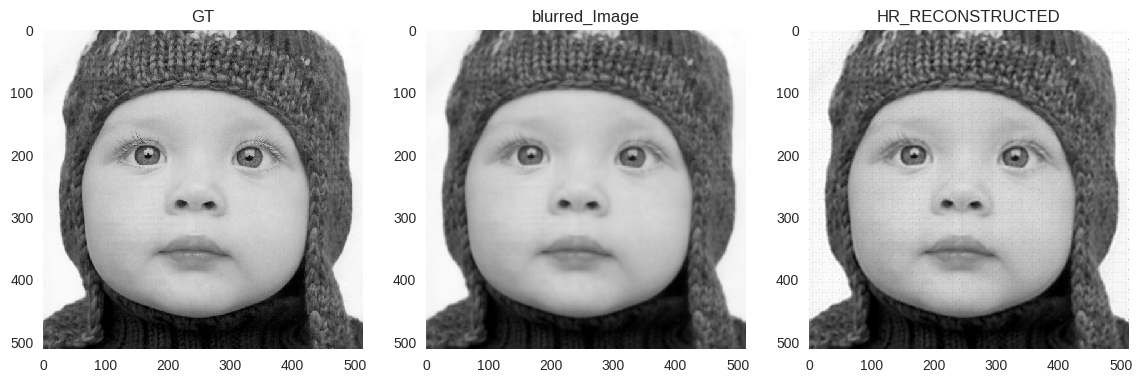

In [34]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = plt.subplot("131")
ax.imshow(original)
ax.set_title("GT")
plt.grid(0)

ax = plt.subplot("132")
ax.imshow(LR)
ax.set_title("blurred_Image")
plt.grid(0)

ax = plt.subplot("133")
ax.imshow(contrast)
ax.set_title("HR_RECONSTRUCTED")
plt.grid(0)
plt.show()